In [153]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.model_selection import train_test_split

In [154]:
n_samples = 20
weight = np.random.normal(loc=50, scale=10, size=n_samples)  # Peso dos ratos em gramas
size = 30 + 0.5 * weight + np.random.normal(loc=0, scale=5, size=n_samples)
tail_size = size * np.random.uniform(0.001,0.1,1)
rats = {
    'weight': weight,
    'size': size,
    'tail_size': tail_size
}
dataframe = pd.DataFrame(rats)
dataframe

,weight,size,tail_size
0,53.544728,67.793709,0.642702
1,59.607196,57.419293,0.544350
2,39.500106,40.643867,0.385315
3,48.305743,55.337727,0.524616
4,47.572014,54.134509,0.513210
5,52.624570,58.953876,0.558898
6,67.219972,64.115220,0.607829
7,41.298945,46.134354,0.437366
8,66.786183,67.196648,0.637042
9,48.931058,56.465043,0.535304


<Axes: >

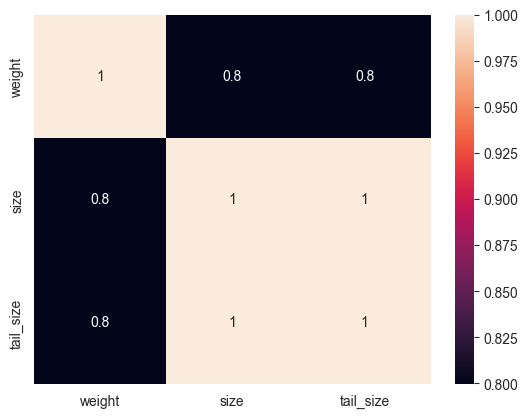

In [155]:
sns.heatmap(dataframe.corr(), annot=True)

### Usando OLS 

In [156]:
X = dataframe.drop('weight', axis=1)
X = sm.add_constant(X)
y = dataframe['weight']
model = sm.OLS(y, X)
results = model.fit()

In [157]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     31.90
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.34e-05
Time:                        14:32:54   Log-Likelihood:                -64.850
No. Observations:                  20   AIC:                             133.7
Df Residuals:                      18   BIC:                             135.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7034     10.460     -0.832      0.416     -30.680      13.273
size           1.0533      0.186      5.648      0.000       0.662       1.445
tail_size      0.0100      0.002      5.648      0.000       0.006       0.014
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.290
Skew:                           0.257   Prob(JB):                        0.865
Kurtosis:                       2.712   Cond. No.                     1.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.21e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Usando ridge

In [158]:
ridge_model = sm.OLS(y,X)
ridge_model_results = ridge_model.fit_regularized(alpha=0.001)

In [159]:
ridge_model_results.params

const        13.578248
size          0.660019
tail_size     0.000000
dtype: float64

In [160]:
ridge_model = sm.OLS(y, X)
ridge_model_results = ridge_model.fit_regularized(alpha=0.01)
ridge_model_results.params

const        13.294051
size          0.665034
tail_size     0.000000
dtype: float64

In [161]:
ridge_model = sm.OLS(y, X)
ridge_model_results = ridge_model.fit_regularized(alpha=0.1)
ridge_model_results.params

const        10.45208
size          0.71518
tail_size     0.00000
dtype: float64

In [162]:
ridge_model = sm.OLS(y, X)
ridge_model_results = ridge_model.fit_regularized(alpha=0.5)
ridge_model_results.params

const        0.000000
size         0.899585
tail_size    0.000000
dtype: float64

In [163]:
ridge_model = sm.OLS(y, X)
ridge_model_results = ridge_model.fit_regularized(alpha=1)
ridge_model_results.params

const        0.000000
size         0.899426
tail_size    0.000000
dtype: float64

# Exemplo com previsão e metricas

In [164]:
X = dataframe.drop('weight', axis=1)
y = dataframe['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [166]:
y_pred_lr = lr.predict(X_test)

In [170]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [171]:
y_ridge_pred = ridge.predict(X_test)

In [ ]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)

In [172]:
print('Linear Regression Accuracy:', metrics.r2_score(y_test, y_pred_lr))
print('Ridge Regression Accuracy:', metrics.r2_score(y_test, y_ridge_pred))

Linear Regression Accuracy: 0.46543686117601857
Ridge Regression Accuracy: 0.4654550206287098
